# Analyse de données du fichier 'EdStatsCountry.csv'

On importe les données dans le DataFrame.
On observe qu'il y a 241 lignes et 32 colonnes

Version Colab

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#use_colab=True
#if use_colab:
  #from google.colab import drive
  #drive.mount('/content/drive')
#pd.set_option('display.max_rows', None) #affichage de toutes les lignes
#df = pd.read_csv ('/content/drive/MyDrive/Projet OpenClassrooms/Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv') 



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Version Locale

In [ ]:
import pandas as pd
df = pd.read_csv ('EdStatsCountry.csv') 

In [ ]:
df1=df

display(df1.head())


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
df1.drop('Unnamed: 31',1,inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Il n'y a pas de doublons grace au calcul suivant

In [ ]:
print(len(df1)-len(df1.drop_duplicates()))




0


Cette fonction permet de voir si des colonnes ont des données manquantes

In [ ]:
df1.isnull().any()


Country Code                                         False
Short Name                                           False
Table Name                                           False
Long Name                                            False
2-alpha code                                          True
Currency Unit                                         True
Special Notes                                         True
Region                                                True
Income Group                                          True
WB-2 code                                             True
National accounts base year                           True
National accounts reference year                      True
SNA price valuation                                   True
Lending category                                      True
Other groups                                          True
System of National Accounts                           True
Alternative conversion factor                         Tr

On peut voir le pourcentage de nombres de données manquantes (par colonne) par rapport au nombre
de données totales. On remarque que les données qui sont les plus absentes sont les données sur les années pour lesquelles nous avons les données économiques ainsi que les statuts sur les assurances maladies pour chaque pays. On observe aussi un manque de données sur les données économiques et industrielles. Il nous manque donc des éléments importants. 

In [ ]:
count_row = df1.shape[0]
display(count_row)
(100*df1.isnull().sum()/(count_row))


241

Country Code                                          0.000000
Short Name                                            0.000000
Table Name                                            0.000000
Long Name                                             0.000000
2-alpha code                                          1.244813
Currency Unit                                        10.788382
Special Notes                                        39.834025
Region                                               11.203320
Income Group                                         11.203320
WB-2 code                                             0.414938
National accounts base year                          14.937759
National accounts reference year                     86.721992
SNA price valuation                                  18.257261
Lending category                                     40.248963
Other groups                                         75.933610
System of National Accounts                          10

On séléctionne ici les colonnes qui nous intéressent.
 L'OCDE(dans le DataFrame OECD), abréviation pour organisation de coopération et de développement économiques, est un organisme international consultatif regroupant une trentaine de pays et faisant des études économiques, notamment sur les échanges commerciaux.

In [ ]:

Tab=df1[["Short Name","Region", "Income Group"]]

display(Tab.sort_values(by=['Region']))


,Short Name,Region,Income Group
117,Lao PDR,East Asia & Pacific,Lower middle income
37,China,East Asia & Pacific,Upper middle income
192,Solomon Islands,East Asia & Pacific,Lower middle income
191,Singapore,East Asia & Pacific,High income: nonOECD
182,French Polynesia,East Asia & Pacific,High income: nonOECD
175,Papua New Guinea,East Asia & Pacific,Lower middle income
174,Palau,East Asia & Pacific,Upper middle income
173,Philippines,East Asia & Pacific,Lower middle income
70,Fiji,East Asia & Pacific,Upper middle income
73,Micronesia,East Asia & Pacific,Lower middle income



On supprime les lignes avec des NAN.

In [ ]:
liste1= Tab[Tab['Income Group'].notna()]
display(liste1.sort_values(by=['Region']))
Count1=len(liste1)
print(Count1)




,Short Name,Region,Income Group
117,Lao PDR,East Asia & Pacific,Lower middle income
37,China,East Asia & Pacific,Upper middle income
192,Solomon Islands,East Asia & Pacific,Lower middle income
191,Singapore,East Asia & Pacific,High income: nonOECD
182,French Polynesia,East Asia & Pacific,High income: nonOECD
175,Papua New Guinea,East Asia & Pacific,Lower middle income
174,Palau,East Asia & Pacific,Upper middle income
173,Philippines,East Asia & Pacific,Lower middle income
70,Fiji,East Asia & Pacific,Upper middle income
73,Micronesia,East Asia & Pacific,Lower middle income


214


In [ ]:
liste_calcul=[]
liste_input=[]

In [ ]:
n=7
liste_calcul=[]
liste_input=[]

for i in range(n):
     
    var_region = input("Enter string:")


    Tab1=liste1[liste1['Region'].str.contains(var_region)]
    count_rowTab1 = Tab1.shape[0]
    Tab2=Tab1[Tab1['Income Group'].str.contains('High')]
    (Tab2.sort_values(by=['Income Group']))
    count_rowTab2 = Tab2.shape[0]
    print(Tab2)
    print(count_rowTab2)
    PourcentageRegion  = (count_rowTab2/count_rowTab1) *100

    print("Pourcentage de pays à haut revenus: ",PourcentageRegion)
    print("")
    
    liste_calcul.append(PourcentageRegion)
    liste_input.append(var_region)

    

Enter string:East Asia & Pacific
                   Short Name               Region          Income Group
11                  Australia  East Asia & Pacific     High income: OECD
29                     Brunei  East Asia & Pacific  High income: nonOECD
87                       Guam  East Asia & Pacific  High income: nonOECD
90       Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD
107                     Japan  East Asia & Pacific     High income: OECD
114                     Korea  East Asia & Pacific     High income: OECD
133          Macao SAR, China  East Asia & Pacific  High income: nonOECD
151  Northern Mariana Islands  East Asia & Pacific  High income: nonOECD
159             New Caledonia  East Asia & Pacific  High income: nonOECD
167               New Zealand  East Asia & Pacific     High income: OECD
182          French Polynesia  East Asia & Pacific  High income: nonOECD
191                 Singapore  East Asia & Pacific  High income: nonOECD
12
Pourcentage de 

L'analyse de ce premier fichier permet de conclure que l'Amérique du Nord et l'Europe sont de bons candidats pour notre projet.

([<matplotlib.axis.XTick at 0x7fafec118a50>,
 [Text(0, 0, 'Pacific'),
  Text(0, 0, 'EU'),
  Text(0, 0, 'AM SUD'),
  Text(0, 0, 'Middle East'),
  Text(0, 0, 'AM NORD'),
  Text(0, 0, 'AF SUD'),
  Text(0, 0, 'ASIE SUD')])

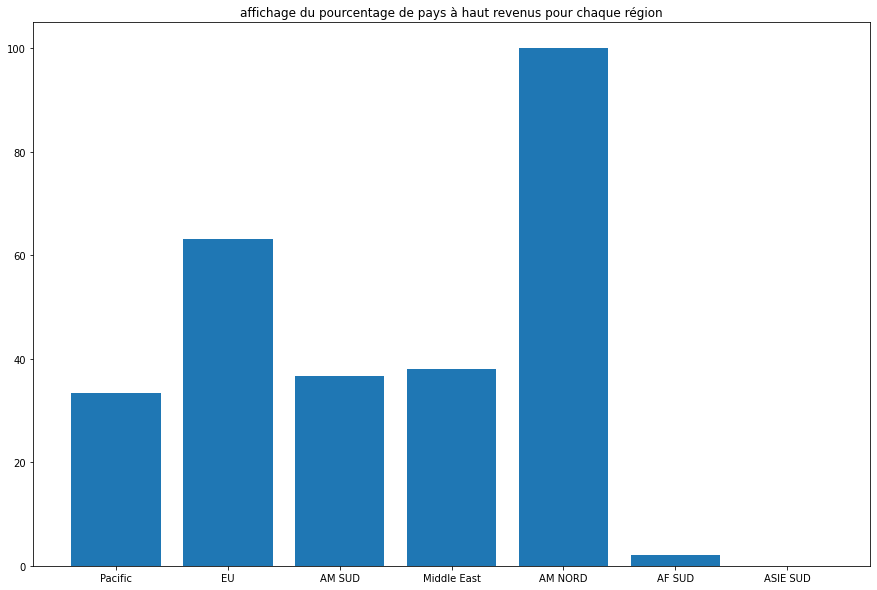

In [ ]:

xs = liste_input
labels = ['Pacific','EU','AM SUD','Middle East','AM NORD','AF SUD','ASIE SUD']
ys=liste_calcul
plt.figure(figsize=(15, 10))
plt.bar(xs,ys)
plt.title('affichage du pourcentage de pays à haut revenus pour chaque région')
plt.xticks(xs,labels)